In [1]:
pip install visualkeras #Visualize the CNN model library

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 992 kB 5.2 MB/s 


In [2]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D # convolution layers
from keras.layers import Dense, Dropout, Flatten # core layers
from tensorflow import keras
#from keras.layers.normalization import BatchNormalization

from keras.preprocessing.image import ImageDataGenerator

from keras.utils.np_utils import to_categorical

from tensorflow.keras.datasets import mnist



In [3]:
num_classes = 10
# Load MNIST Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data() #Loading the MNIST dataset into train and test classes

# Process images into input vectors
# each mnist image is a 28x28 picture with value ranges between 0 and 255
x_train = x_train.astype(np.float32) / 255.
x_train = x_train.reshape(-1, 28,28,1)
x_test = x_test.astype(np.float32) / 255.
x_test = x_test.reshape(-1, 28,28,1)

# converts [1,2] into [[0,1,0], [0,0,1]]
y_train = to_categorical(y_train, num_classes).astype(np.float32)
y_test = to_categorical(y_test, num_classes).astype(np.float32)

#Noisy data
start = 0 #Index start at which noise data is present in the training set, tune to your own interest
end = 60000 #Index at which noise data finished, tune to your own interest
noise_factor_train = 0.75 #Noise intensity scale from 0-1 for training set
noise_factor_test = 0.75 #Noise intensity scale from 0-1 for testing set
x_train[start:end]= x_train[start:end]+ noise_factor_train * np.random.normal(loc=0.0, scale=1.0, size=x_train[start:end].shape) 
x_test_noisy = x_test + noise_factor_test * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 
x_train[start:end] = np.clip(x_train[start:end], 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


11501568/11490434 [==============================] - 0s 0us/step


In [4]:
#Assert the shapes are correct for training set
print(x_train.shape)

print(y_train.shape)

(60000, 28, 28, 1)
(60000, 10)


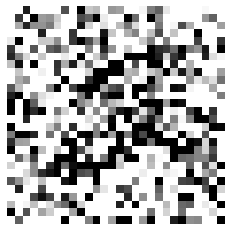

In [5]:
# pick a sample to plot, helps to assert proper distribution of noisy and pure images in the training set
sample = 5 #Select from 0-60,000
X_train__ = x_train.reshape(x_train.shape[0], 28, 28)
image = X_train__[sample]# plot the sample
fig = plt.figure
plt.imshow(image, cmap = 'binary')
plt.axis('off')
plt.show()
print()


(60000, 28, 28)


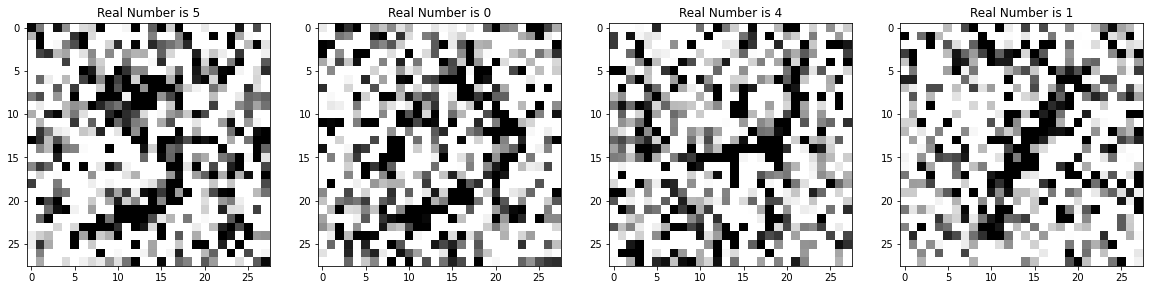

In [6]:
###Data Visualization###
X_train__ = x_train.reshape(x_train.shape[0], 28, 28)


fig, axis = plt.subplots(1, 4, figsize=(20, 10))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_train__[i], cmap='binary')
    digit = y_train[i].argmax()
    ax.set(title = f"Real Number is {digit}");
#plt.savefig('1minst.png', dpi = 700)
print(X_train__.shape)

In [7]:
#Normalization#
mean = np.mean(x_train)
std = np.std(x_train)

def standardize(x):
    return (x-mean)/std

epochs = 20
batch_size = 64

In [8]:
#Building custom CNN Model.
from keras.layers import Dropout


model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(28, 28, 1)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
#model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
#model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
#model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
#model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

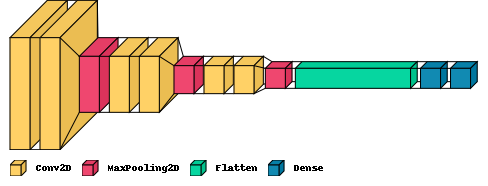

In [9]:
#Visualize the Model
import visualkeras
visualkeras.layered_view(model).show()
visualkeras.layered_view(model, legend = True, to_file='output.png') # write to disk
visualkeras.layered_view(model, legend = True, to_file='output.png').show()
visualkeras.layered_view(model, legend=True)

In [ ]:
#Compile the model with selected optimizer and loss function
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
#Train the model
history = model.fit(x_train,y_train, batch_size=batch_size,epochs=epochs, validation_data = (x_test, y_test) , shuffle = True)

Epoch 1/20
938/938 [==============================] - 17s 6ms/step - loss: 0.1280 - accuracy: 0.9610 - val_loss: 0.0479 - val_accuracy: 0.9847
Epoch 2/20
938/938 [==============================] - 5s 6ms/step - loss: 0.0386 - accuracy: 0.9883 - val_loss: 0.0362 - val_accuracy: 0.9881
Epoch 3/20
938/938 [==============================] - 5s 6ms/step - loss: 0.0278 - accuracy: 0.9915 - val_loss: 0.0322 - val_accuracy: 0.9888
Epoch 4/20
938/938 [==============================] - 5s 6ms/step - loss: 0.0234 - accuracy: 0.9927 - val_loss: 0.0334 - val_accuracy: 0.9897
Epoch 5/20
938/938 [==============================] - 5s 6ms/step - loss: 0.0178 - accuracy: 0.9944 - val_loss: 0.0231 - val_accuracy: 0.9931
Epoch 6/20
938/938 [==============================] - 6s 6ms/step - loss: 0.0161 - accuracy: 0.9951 - val_loss: 0.0284 - val_accuracy: 0.9918
Epoch 7/20
938/938 [==============================] - 5s 6ms/step - loss: 0.0140 - accuracy: 0.9958 - val_loss: 0.0535 - val_accuracy: 0.9845
Epoch

In [ ]:
#Access layers of the model [i]
selected_layer = -1 #Choose from available layers to see the weights
model.layers[selected_layer].get_weights()

[array([[ 0.15205209, -0.03084297, -0.05908434, ..., -0.1280095 ,
         -0.15673025,  0.07258438],
        [-0.16033936,  0.08083486,  0.05094604, ..., -0.17138287,
          0.06265454,  0.06983948],
        [-0.10401153, -0.1699031 ,  0.04363297, ..., -0.173504  ,
         -0.1537458 ,  0.13445295],
        ...,
        [ 0.11458135,  0.07273565,  0.10590799, ...,  0.11744317,
         -0.00525966, -0.11588886],
        [ 0.11561123, -0.14513768, -0.1654958 , ..., -0.00898561,
         -0.327797  , -0.02773849],
        [ 0.11350808,  0.10450242, -0.27394512, ..., -0.07849418,
         -0.05750968, -0.01737601]], dtype=float32),
 array([ 0.01321068,  0.21592629, -0.08238573, -0.07916712,  0.00333368,
        -0.01273036, -0.02499523,  0.00642261, -0.00165277, -0.0459755 ],
       dtype=float32)]

In [ ]:
#Save the model for retraining 
model.save('NP_trained.h5')


In [ ]:
#Obtain the average of the accuracy in validation
np.mean(history.history['val_accuracy'])

In [ ]:
# Generate generalization metrics
score = model.evaluate(x_test, y_test, verbose=0) 
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# Visualize history
# Plot history: Loss
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)


fig = plt.figure(figsize=(10, 10)) # Set Figure

y_pred = model.predict(x_test_noisy) # Predict encoded label as 2 => [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
Y_test = np.argmax(y_test, 1) # Decode labels

mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix

In [ ]:
# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

y_pred = model.predict(x_test_noisy)
X_test__ = x_test_noisy.reshape(x_test_noisy.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Real Number is {y_test[i].argmax()}\nPredict Number is {y_pred[i].argmax()}");